In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Flatten,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [3]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'E:\\Aquib\\MCA\Python\\SIIM-ISIC Melanoma Classification\\data\\train',
    target_size=(224,224),class_mode='binary',batch_size=32)

test_generator = test_datagen.flow_from_directory(
    "E:\\Aquib\\MCA\Python\\SIIM-ISIC Melanoma Classification\\data\\test",
    target_size = (224,224),class_mode='binary',batch_size = 32
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = (224,224,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(BatchNormalization())

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 256)       0

In [6]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [7]:

model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 83 steps, validate for 21 steps
Epoch 1/5
83/83 [==============================] - 338s 4s/step - loss: 0.8084 - accuracy: 0.6276 - val_loss: 0.5612 - val_accuracy: 0.6758
Epoch 2/5
83/83 [==============================] - 330s 4s/step - loss: 0.4736 - accuracy: 0.7687 - val_loss: 0.4244 - val_accuracy: 0.7803
Epoch 3/5
83/83 [==============================] - 329s 4s/step - loss: 0.4558 - accuracy: 0.7759 - val_loss: 0.4225 - val_accuracy: 0.7848
Epoch 4/5
83/83 [==============================] - 274s 3s/step - loss: 0.4295 - accuracy: 0.7960 - val_loss: 0.3811 - val_accuracy: 0.8288
Epoch 5/5
83/83 [==============================] - 301s 4s/step - loss: 0.4300 - accuracy: 0.7983 - val_loss: 0.4225 - val_accuracy: 0.7758


In [9]:
model.evaluate(test_generator)

  ...
    to  
  ['...']
21/21 [==============================] - 15s 720ms/step - loss: 0.4225 - accuracy: 0.7758


[0.42249450939042227, 0.77575755]

In [12]:
history = pd.DataFrame(model.history.history)

<AxesSubplot:>

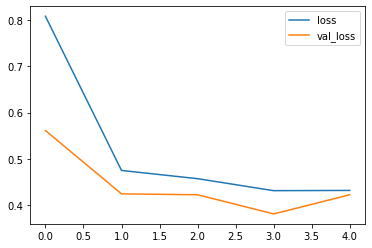

In [13]:
history[['loss','val_loss']].plot()

<AxesSubplot:>

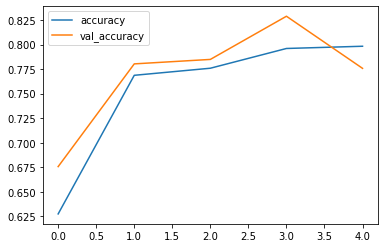

In [14]:
history[['accuracy','val_accuracy']].plot()

[[0]]


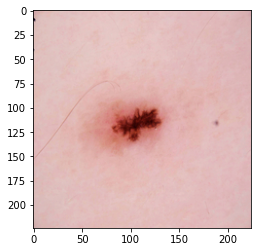

In [31]:
from tensorflow.keras.preprocessing import image
image_path = "E:\\Aquib\\MCA\\Python\\SIIM-ISIC Melanoma Classification\\data\\test\\benign\\1.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict_classes(img)
# prediction = np.argmax(prediction,axis=1)
print(prediction)
plt.imshow(new_img)

In [32]:
model.save('Keras_model.h5')